# Chapter 2 Training and Testing
## Exercises

#### Exercise 2.1
1. Positive rays: break point $k = 2$ and $m_{\mathcal{H}}(k) = k+1 = 3 \lt 2^k = 4$.
1. Positive intervals: break point $k = 3$ and $m_{\mathcal{H}}(k) = {k+1 \choose 2} +1 = 7 \lt 2^k = 8$.
1. Convex sets: no break point exists. For any $k$, we can find a set of $k$ points on a circle that can be shattered. 

#### Exercise 2.2
1. (a) 
  * (i) $k=2$, $RHS = \sum^{1}_{i=0}{N \choose i} = N+1$, while $m_{\mathcal{H}}(N) = N+1$, so $m_{\mathcal{H}}(N) \le \sum^{k}_{i=0}{N \choose i}$
  * (ii) $k=3$, $RHS = \sum^{2}_{i=0}{N \choose i} = \frac{N(N-1)}{2} + N+1 = \frac{N(N+1)}{2} + 1$, while $m_{\mathcal{H}}(N) = {N+1 \choose 2}+1 = \frac{N(N+1)}{2} + 1$, so $m_{\mathcal{H}}(N) \le \sum^{k}_{i=0}{N \choose i}$
  * (iii) There's no such $k$ exists. Maximum $k = N+1$, since $\sum^{N}_{i=0}{N \choose i} = 2^N$, we still have $m_{\mathcal{H}}(N) \le \sum^{k}_{i=0}{N \choose i}$
  
1. (b) If $m_{\mathcal{H}}(N) = N+2^{\frac{N}{2}}$, then the break point $k=3$. According to bound theorem 2.4, we have for all $N$, $m_{\mathcal{H}}(N) = N+2^{\frac{N}{2}} \le \sum^{2}_{i=0}{N \choose i} = \frac{N(N+1)}{2} + 1$. But this won't hold for all $N$ since left hand side is exponentially increasing while the RHS is polynomical increasing. For example, when $N=20$, the inequality breaks. So such hypothesis set doesn't exist. 

#### Exercise 2.3
1. (i) $d_{VC} = 1$
1. (ii) $d_{VC} = 2$
1. (iii) $d_{VC} = \infty$

#### Exercise 2.4 TODO
1. (a) 

#### Exercise 2.5
Through equation (2.12), we find that $\delta = 709.527509678$, so the probability is just greater or equal to zero. 

In [13]:
# Exercise 2.5
import numpy as np
N = 100
d = 0.1
mh = 2*N + 1
delta = 4*mh / np.exp(N * d**2 /8)
delta, np.exp(N * d**2 /8)

(709.5275096780147, 1.1331484530668263)

#### Exercise 2.6
* (a) Apply the error bar in $(2.1)$, i.e. $E_{out}(g) \le E_{in}(g) + \sqrt{\frac{1}{2N}\ln{\frac{2M}{\delta}}}$. 

The following calculation shows that error on $E_{in}(g) = 0.1151$ and error on $E_{test}(g) = 0.096$. So the error bar on in-sample error is higher than the error bar from test error. 

* (b) If we reserve more examples for testing, then we'll have less samples for training. We may end up with a hypothesis that is not as good as we could have arrived if using more training samples. So $E_{test}(g)$ might be way too off even the error bar on it is small.

In [11]:
# Exercise 2.6
import numpy as np
epsilon = 0.05

N = 200
# test bound
print('test bound: ', np.sqrt(np.log(2/epsilon)/2/N))

# train bound
M = 1000
N = 400
print('train bound: ', np.sqrt(np.log(2*M/epsilon)/2/N))

test bound:  0.09603227913199208
train bound:  0.11509037065006825


#### Exercise 2.7 
1. (a) 

\begin{align*}
P[h(x)\ne f(x)] &= P[h(x)\ne f(x)]\cdot 1 + P[h(x) = f(x)]\cdot0 \\
&= P[h(x)\ne f(x)] (h(x)-f(x))^2 + P[h(x) = f(x)] (h(x)-f(x))^2 \\
&= E[(h(x)-f(x))^2]
\end{align*}

1. (b) 

\begin{align*}
P[h(x)\ne f(x)] &= \frac{1}{4}P[h(x)\ne f(x)]\cdot 4 + \frac{1}{4}P[h(x) = f(x)]\cdot0 \\
&= \frac{1}{4}P[h(x)\ne f(x)] (h(x)-f(x))^2 + \frac{1}{4}P[h(x) = f(x)] (h(x)-f(x))^2 \\
&= \frac{1}{4}E[(h(x)-f(x))^2]
\end{align*}

#### Exercise 2.8

1. (a) If $\mathcal{H}$ is closed under linear combination, for any $x$, $\bar{g}(x)$ is weighted (by probability of data) average of hypotheses in $\mathcal{H}$, so $\bar{g}(x) \in \mathcal{H}$.

1. (b) If $\mathcal{H}$ is a set of functions defined on intervals, e.g. $f(x) = c$ when $x \in [a,b]$, otherwise $f(x) = 0$. Then $\bar{g}(x)$ probably won't have constant value in an interval and not in the original hypothesis set.

1. (c) For binary classification, each $g(x)$ will have value $+1$ or $-1$, when weighted by probabilities, the average is not binary any more. 

#### Problem 2.1

For $\epsilon \le k$, we have $N \ge \frac{1}{2k^2}ln\frac{2M}{\delta}$

In [10]:
def calc_N(M, delta, k):
    return np.log(2*M/delta)/2/k/k
delta = 0.03
k = 0.05
for M in [1,100, 10000]:
    N = calc_N(M, delta, k)
    print("Samples needed for M = {}:\tN = {}".format(M, N))


Samples needed for M = 1:	N = 839.9410155759854
Samples needed for M = 100:	N = 1760.9750527736032
Samples needed for M = 10000:	N = 2682.0090899712213


#### Problem 2.2
For $N=4$, we can pick points: $(1,3),(2,4),(3,1),(4,2)$. It's easy to see that these points are shattered by positive rectangles. So $m_{\mathcal{H}}(4) = 2^4$.

The idea is that for any two points, if we draw a rectangle using them as diagnoal points, the rectangle should NOT contain any other point. Otherwise, whenever the two diagnoal points have values 1, the middle point will have value 1 as well, which excludes the possibility of having -1. 

For $N=5$, if we draw horizontal and vertical lines through each of the four points above, the plane is divided into grids. The four points enclusing a 9-grid area. It's clear that the fifth point can't lie within the 9-grid area. Otherwise, there'll always a rectangle (constructed by two points) contains the fifth point. 

In the same way, if we place the fifth point outside the 9-grid area, it's easy to see that the point will always lie below or above at least two points (in either x or y direction). These three points construct a rectangle which contains a point in it. 
This shows that $m_{\mathcal{H}}(5) \lt 2^5$.

We have the VC dimension $d_{VC}(\mathcal{H}) = 4$, and $m_{\mathcal{H}}(N) \le \sum^{4}_{i=0} {N \choose i}$.

#### Problem 2.3
1. (a) $d_{VC}(\mathcal{H}) = 2$, $m_{\mathcal{H}}(N) = {N+1 \choose 1} + {N-1 \choose 1} = 2N$

1. (b) $d_{VC}(\mathcal{H}) = 3$, $m_{\mathcal{H}}(N) = {N+1 \choose 2}+1 +{N-1 \choose 2} = N^2 - N + 2$

1. (c) $d_{VC}(\mathcal{H}) = 2$, $m_{\mathcal{H}}(N) = {N+1 \choose 2}+1 = \frac{(N+1)N}{2} + 1$

#### Problem 2.4 TODO

#### Problem 2.5

* For $N=1$, 
  * if $D=0$, $\sum^{D}_{i=0}{N \choose i} = {1 \choose 0 }\le N^D + 1 = 2$.
  * if $D=1$, $\sum^{D}_{i=0}{N \choose i} = {1 \choose 0 } + {1 \choose 1} \le N^D + 1 = 2$.
* Suppose the inequality is valid at $N$ or less. let's see what happens at $N+1$.

\begin{align*}
\sum^{D}_{i=0}{N+1 \choose i} &= \sum^{D}_{i=0}{N \choose i} + {N \choose i-1}\\
&= \sum^{D}_{i=0}{N \choose i} + \sum^{D-1}_{k=0}{N \choose k}\\
&\le N^D + 1 + N^{D-1} + 1\\
&= (N^D + N^{D-1} + 1) + 1\\
&\le (N+1)^D + 1
\end{align*}

The last inequality is obvious when $D \gt 1$ and we expand $(N+1)^D$ into terms of $N$, i.e. $(N+1)^D = \sum_{k=0}^{D} {D \choose k}N^k$

* When $D=0$, we have $\sum^{D}_{i=0}{N \choose i} = {N \choose 0 }\le N^0 + 1 = 1$.
* When $D=1$, we have $\sum^{D}_{i=0}{N \choose i} = {N \choose 0 } + {N \choose 1 } = 1 + N \le N^1 + 1$.

So we proved $\sum^{D}_{i=0}{N \choose i} \le N^D + 1$. Hence $m_{\mathcal{H}}(N) \le  \sum^{d_{VC}}_{i=0}{N \choose i} \le N^{d_{VC}}+1$.

#### Problem 2.6
1. (a) $\sum^{d}_{i=0}{N \choose i} \le \sum^{d}_{i=0}{N \choose i} (\frac{N}{d})^{d-i} = (\frac{N}{d})^d \sum^{d}_{i=0}{N \choose i} (\frac{d}{N})^{i} \le (\frac{N}{d})^d \sum^{N}_{i=0}{N \choose i} (\frac{d}{N})^{i}$

The first inequality is valid because $\frac{N}{d} \ge 1$ for $N\ge d$, and $d-i\ge 0$, so $(\frac{N}{d})^{d-i} \ge 1$.

1. (b) $\sum^{N}_{i=0}{N \choose i} (\frac{d}{N})^{i} = (\frac{d}{N} + 1)^N = (1 + \frac{1}{N/d})^{(N/d)d} \le e^d$ from Binomial theorem $(1+\frac{1}{x})^x \le e$ for $x\gt 0$.
We thus have $\sum^{d}_{i=0}{N \choose i} \le (\frac{N}{d})^d \sum^{N}_{i=0}{N \choose i} (\frac{d}{N})^{i} \le (\frac{N}{d})^d e^d \le (\frac{eN}{d})^d$.

By theorem 2.4, we have $m_{\mathcal{H}}(N) \le \sum^{d_{VC}}_{i=0}{N \choose i} \le (\frac{eN}{d_{VC}})^{d_{VC}}$.

#### Problem 2.7
When $d_{VC}$ is small, I would like to use bound in problem 2.5, and when $d_{VC}$ is large, I would like to use bound in problem 2.6. The point is to choose a smaller bound so we get a tigher bound on error estimate.

Text(0.5, 1.0, 'dvc = 5')

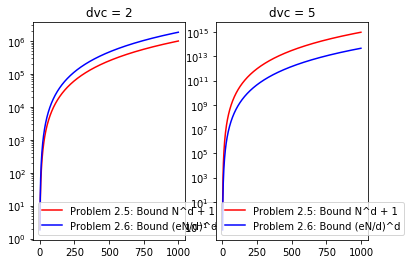

In [62]:
#### Problem 2.7
import matplotlib.pyplot as plt

def bound1(N, d):
    return N**d + 1
def bound2(N, d):
    return np.power((np.exp(1)*N/d),d)

fig, axs = plt.subplots(1,2)
dvc = 2
x = np.arange(1,1000)*1.0 #need to float the avoid overflow
y1 = bound1(x, dvc)
y2 = bound2(x, dvc)
axs[0].plot(x, y1, color='red', label='Problem 2.5: Bound N^d + 1')
axs[0].plot(x, y2, color='blue', label='Problem 2.6: Bound (eN/d)^d')
axs[0].legend()
axs[0].set_yscale('log')
axs[0].set_title("dvc = 2")

dvc = 5
y21 = bound1(x, dvc)
y22 = bound2(x, dvc)
axs[1].plot(x, y21, color='red', label='Problem 2.5: Bound N^d + 1')
axs[1].plot(x, y22, color='blue', label='Problem 2.6: Bound (eN/d)^d')
axs[1].set_yscale('log')
axs[1].legend()
axs[1].set_title("dvc = 5")

#### Problem 2.8

They are all possible since they $\le 2^N$.

#### Problem 2.9 TODO

#### Problem 2.10 TODO

Suppose the VC dimension is $d_{VC}$
* When $2N \le d_{VC}$, $m_{\mathcal{H}}(2N) = 2^{2N} = (2^{N})^2 = m_{\mathcal{H}}(N)^2 $.
* When $N \le d_{VC}$ and $2N \gt d_{VC}$, we have $m_{\mathcal{H}}(N) = 2^N$ and $m_{\mathcal{H}}(2N) < 2^{2N}$, so $m_{\mathcal{H}}(2N) \le m_{\mathcal{H}}(N)^2$.
* When $N \gt d_{VC}$, we look at the upper bounds here. $ m_{\mathcal{H}}(N) \le N^{d_{VC}} + 1$ and $ m_{\mathcal{H}}(2N) \le (2N)^{d_{VC}} + 1$. So we have $m_{\mathcal{H}}(N)^2 \le \left(N^{d_{VC}} + 1\right)^2$, clearly $ (2N)^{d_{VC}} + 1 \le \left(N^{d_{VC}} + 1\right)^2$, so $m_{\mathcal{H}}(2N) \le m_{\mathcal{H}}(N)^2$.

#### Problem 2.11

The larger number of training samples, the smaller generalization bound.

In [63]:
#### Problem 2.11

import numpy as np
def vc_bound(N, growth, delta):
    return np.sqrt(8*np.log(4*growth(2*N)/delta)/N)

def growth(N):
    return N+1

delta = 0.1
for N in [100, 10000]:
    print('N={}: VC bound = {}'.format(N, vc_bound(N, growth, delta)))

N=100: VC bound = 0.8481596247015304
N=10000: VC bound = 0.10427815497178729


#### Problem 2.12

For an $\mathcal{H}$ with $d_{VC}=10$, we need a sample size of about 452950.

In [72]:
#### Problem 2.12

dvc = 10
delta = 0.05
epsilon = 0.05

def sample_size(N0, d, delta, epsilon, maxit=1000, tol = 10):
    N = N0
    for it in range(maxit):
        rhs = 8 * np.log(4*((2*N)**d+1)/delta)/epsilon/epsilon
        res = N - rhs
        #print('rhs: ', rhs, 'N: ', N)
        if np.abs(res) <= tol:
            break
        N = int(rhs)
    return N

N0 = 1000
print('Sample size: {}'.format(sample_size(N0, dvc, delta, epsilon)))

Sample size: 452950


#### Problem 2.13

1. (a) if $d_{VC}(\mathcal{H}) \gt log_2M$, we know that the growth function for $d_{VC}$ points is $m_{\mathcal{H}}(d_{VC}) = 2^{d_{VC}} \gt M$, meaning the number of hypotheses that shatters $d_{VC}$ points are larger than $M$. This contradicts with the fact that $\mathcal{H}$ only has finite $M$ hypotheses. 

1. (b) $d_{VC}\left(\cap^{K}_{k=1}\mathcal{H}_k\right) \le min_{k} d_{VC}(\mathcal{H}_k)$ and $d_{VC}\left(\cap^{K}_{k=1}\mathcal{H}_k\right) \ge 0$

The lower bound of the intersection set can be zero because the intersection of the hypothesis sets can be empty. 
If $d_{VC}\left(\cap^{K}_{k=1}\mathcal{H}_k\right) \gt min_{k} d_{VC}(\mathcal{H}_k)$, it means that there exists $\hat{d} = d_{VC}\left(\cap^{K}_{k=1}\mathcal{H}_k\right)$ points such that the intersection hypothesis set can shatter.  Since it comes from the intersection, it means the hypotheses belong to one of the hypothesis sets as well, including the set with minimum VC dimension. That says this set is capable of shatter points more than its VC dimension. This contradicts. 

1. (c)  $d_{VC}\left(\cup^{K}_{k=1}\mathcal{H}_k\right) \le \sum_{k=1}^{K} d_{VC}(\mathcal{H}_k)$, otherwise, if the union set's VC dimension is larger than the sum, it requires at least one of the sets to shatter more than its VC dimension, this contradicts.

$d_{VC}\left(\cup^{K}_{k=1}\mathcal{H}_k\right) \ge max_{k} d_{VC}(\mathcal{H}_k)$ because we can always pick the set with the largest VC dimension from the union set, and it'll always be able so shatter the number of VC dimension points.

#### Problem 2.14 TODO
1. (a) 
1. (b) Take the log on both sides of $2^l \gt 2Kl^{d_{VC}}$, we have $l \gt 1 + logK + d_{VC} log l$, i.e. $d_{VC} log l\lt l - 1 - logK $

#### Problem 2.15 TODO
#### Problem 2.16 

1. (a) The polynomial $\sum_{i=0}^D c_ix^i$ has $D$ roots, for a set of $D+1$ points, assume we can find a solution for the $c_i$s given these point and the coefficients $c_i$ are such that the $D$ roots will fall on the $D$ intervals (between the minimum and maximum of the $D+1$ points) of the $D+1$ points. Then we know that the polynomial will change sign when we move from the left of a root to its right. So for any dichotomy of the $D+1$ points, one can choose a polynomial that matches the signs on each point. Thus there are $D+1$ points that can be shattered by $\mathcal{H}$.

1. (b) For any given $D+2$ points, since there are only $D$ roots, there are at least two points that are either on the left most or right most side of all roots, or are between two neighboring roots. Either case, these two points have the same sign, thus the $D+2$ points can't be shattered by $\mathcal{H}$. 

From above two, we see that the VC dimension of $\mathcal{H}$ is exactly $D+1$. 


#### Problem 2.17

* Proof

If the VC dimension $d_1$ of $\mathcal{H}$ w.r.t. $\mathcal{X}_1$ is larger than the VC dimension $d_2$ of $\mathcal{H}$ w.r.t. $\mathcal{X}_2$, i.e. $d_1 \gt d_2$.  Then it means for any given $d_1$ points in $\mathcal{X}_1$, they can be shattered by $\mathcal{H}$, since $\mathcal{X}_1 \subseteq \mathcal{X}_2$, it means these $d_1$ points also belong to $\mathcal{X}_2$, so $\mathcal{H}$ can shatter $d_1$ points in  $\mathcal{X}_2$ as well. However, this contraditcs with the fact that the VC dimension of $\mathcal{H}$ w.r.t. $\mathcal{X}_2$ is $d_2 \lt d1$.

* Apply this to the 2.16 (b) problem: 

From above proof, we can apply this to problem 2.16 (b). For any given $D+2$ points, consider its subsets of $D+1$ points. As proved in 2.16 (a) the maximum VC dimension of any $D+1$ points is $D+1$. From proof in 2.17, we see the maximum VC dimension the $D+1$ points can have is the VC dimension of the $D+2$ points. $D+1$ is the maximum VC dimension of the $D+1$ points, so this is also the VC dimension of $D+2$ points. This shows that $D+2$ points can't be shattered by $\mathcal{H}$.

* Relationship of problem 2.16 with a perceptron in $D$ dimensions

If we treat each $x^i$ as a coordinate in the $i$th dimension, then the hypothesis $\mathcal{H}$ in problem 2.16 is just the perceptron hypothesis with a special input space $\mathcal{X}$, where the coordinates are in ratio. Thus problem 2.16 proves that the VC dimension for such perceptron in $D$ dimension is just $D+1$. 

#### Problem 2.18

Consider $N$ points of $x_1, \dots, x_N$, where $x_n = 10^n$. For an arbitrary dichotomy $y_1, \dots, y_N$, for example, $(-1,1,1,\dots,-1,1)$, lets replace $-1$ with $1$ and $1$ with $0$ so we actually get a number like $K=100\dots10$ for the $N$ points. 

Now if we pick $\alpha$ to be $\frac{K}{10^N}$, e.g. $\alpha=0.100\dots10$ such that the $\alpha x_n$ is odd if $x_n=-1$, and $\alpha x_n$ is even if $x_n = 1$. So $h_{\alpha}(x) = 1$ if $x_n=1$, else $h_{\alpha}(x) = -1$ if $x_n = -1$.

Thus there always exists $\alpha$, and $h_{\alpha}(x)$ that can shatter the $N$ points. 
The VC dimension is infinite for such hypothesis set and input space $x\in \mathcal{R}$.

#### Problem 2.19 TODO

#### Problem 2.20

For (c) and (d) we need solve for the $\epsilon$. Square both sides of the inequations, and move terms related to $\epsilon$ to left side, make a square of $\epsilon$, we can obtain following bounds:

* (c) Parrondo and Van den Broek

\begin{align*}
\epsilon &\le \frac{1}{N} + \sqrt{\frac{1}{N^2} + \frac{1}{N}\ln\frac{6m_{\mathcal{H}}(2N)}{\delta}}\\
\end{align*}

If we solve for $\epsilon$ using this formula and compare with the solution when solving with iterative methods using the original formula, we get the same bounds. 

* (d) Devroye bound:

\begin{align*}
\epsilon &\le \frac{1}{N-2} + \sqrt{\frac{1}{(N-2)^2} + \frac{1}{2(N-2)}\ln\frac{4m_{\mathcal{H}}(N^2)}{\delta}}\\
\end{align*}

Solve Devroye bound iteratively using the original formula doesn't work, the soltuion won't converge, so we use this one instead.

Compare the plots of bounds versus $N$, we see that Parrondo and Van den Broek bound decreases fastest and lowest among the bounds. It looks like the best bound we can have here. 

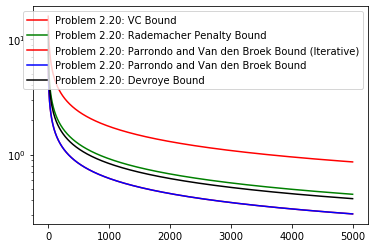

In [64]:
#### Problem 2.20
import numpy as np
from functools import partial
import matplotlib.pyplot as plt

def vc_bound(N, growth, delta):
    return np.sqrt(8*np.log(4*growth(2*N)/delta)/N)

def rade_penalty_bound(N, growth, delta):
    a = np.sqrt(2*np.log(2*N*growth(N))/N)
    b = np.sqrt(-2*np.log(delta)/N)
    return a + b + 1.0/N

# solve Parrondo and Van den Broek bound using iterative methods
def pv_bound_iterative(N, growth, delta, epsilon0 = 0, maxit=1000, tol = 1.0e-6):
    epsilon = epsilon0
    for it in range(maxit):
        rhs = np.sqrt((2*epsilon + np.log(6*growth(2*N)/delta))/N)
        if np.abs(rhs - epsilon) <= tol:
            break
        epsilon = rhs
    return epsilon

# solve Parrondo and Van den Broek bound using direct method
def pv_bound(N, growth, delta):
    return 1.0/N + np.sqrt(1/N/N + np.log(6*growth(2*N)/delta)/N)

# This doesn't converge
def devroye_bound_iterative(N, growth, delta, d, epsilon0 = 0, maxit=1000, tol = 1.0e-6):
    epsilon = epsilon0
    for it in range(maxit):
        #If we use m = N^d + 1, when d is larger, the calculation will overflow
        #rhs = np.sqrt((4*epsilon*(1+epsilon) + np.log(4*growth(N**2)/delta))/2.0/N)
        a = 4*epsilon*(1.0+epsilon)
        b = np.log(4/delta)+2*d*np.log(N)
        rhs = np.sqrt((a + b)/2.0/N)
        print('rhs: ', rhs, 'epsilon: ', epsilon, "a: ", a, "b: ", b, "N: ", N)
        if rhs - epsilon <= tol:
            break
        epsilon = rhs
    return epsilon

def devroye_bound(N, growth, delta, d):
    a = 1/(N-2)
    b = a**2
    #c = a*np.log(4*growth(N**2)/delta)/2 #this overflows easily with N^d
    c = a*(np.log(4/delta)+2*d*np.log(N))
    return a + np.sqrt(b + c)

dvc = 50.0
delta = 0.05
def growth(N, d):
    return N**d + 1

g = partial(growth, d = dvc)

x = np.arange(3, 5000)*1.0
y1,y2,y3,y4, y31 = [],[],[],[], []
for N in x:
    y1.append(vc_bound(N, g, delta))
    y2.append(rade_penalty_bound(N, g, delta))
    y31.append(pv_bound1(N, g, delta))
    y3.append(pv_bound(N, g, delta))
    y4.append(devroye_bound(N, g, delta, dvc))

plt.plot(x, y1, color='red', label='Problem 2.20: VC Bound')
plt.plot(x, y2, color='green', label='Problem 2.20: Rademacher Penalty Bound')
plt.plot(x, y31, color='red', label='Problem 2.20: Parrondo and Van den Broek Bound (Iterative)')
plt.plot(x, y3, color='blue', label='Problem 2.20: Parrondo and Van den Broek Bound')
plt.plot(x, y4, color='black', label='Problem 2.20: Devroye Bound')
plt.yscale('log')
plt.legend()

#### Problem 2.21

Consider

\begin{align*}
\frac{E_{out}(g) - E_{in}(g)}{\sqrt{E_{out}(g)}} &\le \epsilon\\
E_{out}(g) - E_{in}(g) &\le \epsilon\sqrt{E_{out}(g)} \\
(\sqrt{E_{out}(g)} - \frac{\epsilon}{2})^2 - \frac{\epsilon^2}{4} - E_{in}(g) \le 0\\
(\sqrt{E_{out}(g)} - \frac{\epsilon}{2})^2 &\le \frac{\epsilon^2}{4} + E_{in}(g)\\
\sqrt{E_{out}(g)} - \frac{\epsilon}{2} &\le \sqrt{\frac{\epsilon^2}{4} + E_{in}(g)}\\
\sqrt{E_{out}(g)} &\le \frac{\epsilon}{2} + \sqrt{\frac{\epsilon^2}{4} + E_{in}(g)}\\
E_{out}(g) &\le \left(\frac{\epsilon}{2} + \sqrt{\frac{\epsilon^2}{4} + E_{in}(g)}\right)^2\\
E_{out}(g) &\le \frac{\epsilon^2}{4} + \frac{\epsilon^2}{4} + E_{in}(g) + \epsilon \sqrt{\frac{\epsilon^2}{4} + E_{in}(g)}\\
E_{out}(g) &\le E_{in}(g) + \frac{\epsilon^2}{2} + \epsilon \sqrt{\frac{\epsilon^2}{4} + E_{in}(g)}\\
\end{align*}

Now let $\delta = cm_{\mathcal{H}}(2N)\exp(-\frac{\epsilon^2N}{4})$, we have $\epsilon^2 = \frac{4}{N}\log\frac{cm_{\mathcal{H}}(2N)}{\delta} = \xi$, replace this into above inequation, we have

\begin{align*}
E_{out}(g) &\le E_{in}(g) + \frac{\epsilon^2}{2} + \epsilon \sqrt{\frac{\epsilon^2}{4} + E_{in}(g)}\\
E_{out}(g) &\le E_{in}(g) + \frac{\xi}{2} + \sqrt{\xi}\sqrt{\frac{\xi}{4} + E_{in}(g)}\\
E_{out}(g) &\le E_{in}(g) + \frac{\xi}{2}\left[1 + \sqrt{1 + \frac{4E_{in}(g)}{\xi}}\right]\\
\end{align*}

Now use the probability inequation given in the theorem, 

\begin{align*}
P\left[E_{out}(g) \le E_{in}(g) + \frac{\xi}{2}\left[1 + \sqrt{1 + \frac{4E_{in}(g)}{\xi}}\right]\right] &= P\left[\frac{E_{out}(g) - E_{in}(g)}{\sqrt{E_{out}(g)}} \le \epsilon\right] \\
&= 1 - P\left[\frac{E_{out}(g) - E_{in}(g)}{\sqrt{E_{out}(g)}} \gt \epsilon\right]\\
&\ge 1 - cm_{\mathcal{H}}(2N)\exp(-\frac{\epsilon^2N}{4})\\
&\ge 1-\delta\\
\end{align*}

#### Problem 2.22 

\begin{align*}
E_\mathcal{D}\left[E_{out}(g^\mathcal{D})\right] &= E_\mathcal{D}\left[E_{x,y}\left[\left(g^\mathcal{D}(x) - y(x)\right)^2\right]\right]\\
&= E_\mathcal{D}\left[E_{x,y}\left[\left(g^\mathcal{D}(x) - (f(x) + \epsilon)\right)^2\right]\right]\\
&= E_{x,y}\left[E_\mathcal{D}\left[\left(g^\mathcal{D}(x) - (f(x) + \epsilon)\right)^2\right]\right]\\
&= E_{x,y}\left[E_\mathcal{D}\left[g^\mathcal{D}(x)^2 - 2g^\mathcal{D}(x)(f(x) + \epsilon) + (f(x) + \epsilon)^2\right]\right]\\
&= E_{x,y}\left[E_\mathcal{D}[g^\mathcal{D}(x)^2] - 2E_\mathcal{D}[g^\mathcal{D}(x)](f(x) + \epsilon) + (f(x) + \epsilon)^2\right]\\
&= E_{x,y}\left[E_\mathcal{D}[g^\mathcal{D}(x)^2] - \bar{g}(x)^2 + \bar{g}(x)^2 - 2\bar{g}(x)(f(x) + \epsilon) + (f(x) + \epsilon)^2\right]\\
&= E_{x,y}\left[E_\mathcal{D}\left[\left(g^\mathcal{D}(x)-\bar{g}(x)\right)^2\right] + \left(\bar{g}(x) -f(x)\right)^2 - 2\bar{g}(x)\epsilon + 2f(x)\epsilon + \epsilon^2\right]\\
&= E_{x,y}\left[E_\mathcal{D}\left[\left(g^\mathcal{D}(x)-\bar{g}(x)\right)^2\right]\right] + E_{x,y}\left[\left(\bar{g}(x) -f(x)\right)^2\right]  + E_{x,y}\left[\epsilon^2\right]\\
&= variance + bias + \sigma^2\\
\end{align*}

Where the 'average function' $\bar{g}(x) = E_\mathcal{D}[g^\mathcal{D}(x)]$.

#### Problem 2.23

* (i) Find the best hypothesis that appriximates $f$ in the mean-squared-error sense

To find the best hypothesis that approximates $f$ in the mean-squared-error sense, we find the hypothesis that minimizes the mean-squared-error, assume we have $h(x)=ax+b$, then

\begin{align*}
E_x\left[\left(f(x)-h(x)\right)^2\right] &= E_x\left[\left(\sin(\pi x)-(ax+b)\right)^2\right]\\
&= \int^1_{-1}\left[\sin(\pi x)-(ax+b)\right]^2p(x)dx\\
&= \int^1_{-1}\frac{1}{2}\left[\sin(\pi x)-(ax+b)\right]^2dx\\
\end{align*}

Take derivative w.r.t. $a$ and $b$ respectively, and let them equal to $0$, we have

\begin{align*}
\frac{\partial E}{\partial a} &= -\int^1_{-1} x\left[\sin(\pi x) - (ax+b)\right]dx = 0\\
\frac{\partial E}{\partial b} &= -\int^1_{-1} \left[\sin(\pi x) - (ax+b)\right]dx = 0\\
\end{align*}

Solve them we have
\begin{align*}
\frac{2}{\pi}-\frac{2}{3}a&=0 \\
b &= 0\\
\end{align*}
We have $a=\frac{3}{\pi}$

 
So the best hypothesis that approximates $f$ in the mean-squared-error sense are:
  * (a) $h(x) = \frac{3}{\pi} x$.
  * (b) $h(x) = \frac{3}{\pi} x$.
  * (c) $h(x) = 0$.


* (ii) Find the expected value w.r.t. $\mathcal{D}$ of the hypothesis that the learning algorithm produces

Given two points $x_1$ and $x_2$, we have 

\begin{align*}
E_{in}(g) &= \sum^{N}_{i=1} (f(x_i) - h(x_i))^2\\
&= \sum^{N}_{i=1} (\sin(\pi x_i) - (ax_i+b))^2\\
\end{align*}

Take derivative w.r.t. $a$ and $b$ respectively and set to zero, we have

\begin{align*}
\frac{\partial E_{in}(g)}{\partial a} &= -2\sum^{N}_{i=1} x_i(\sin(\pi x_i) - (ax_i+b)) = 0\\
\frac{\partial E_{in}(g)}{\partial b} &= -2\sum^{N}_{i=1} (\sin(\pi x_i) - (ax_i+b)) = 0\\
\end{align*}

To sovle for $a$ and $b$ we multiple second equation by $x_1$ and $x_2$ respectively, and subtract from the first equation, we obtain two equations

\begin{align*}
(x_2 - x_1)(\sin\pi x_2 - ax_2 -b) &= 0\\
(x_1 - x_2)(\sin\pi x_1 - ax_1 -b) &= 0\\
\end{align*}

If we assume $x_1 \ne x_2$, we can solve for $a$ and $b$ and get

\begin{align*}
a &= \frac{\sin\pi x_2 - \sin\pi x_1}{x_2-x_1}\\
b &= \frac{x_2\sin\pi x_1 - x_1\sin\pi x_2}{x_2-x_1}\\
\end{align*}

If $x_1 = x_2$, let $x_2 = x_1 + h$, take this into above equations and let $h \to \infty$, we can obtain a hypothesis tangential to $f$.

So the final hypothesis generated by learning algorithm is: 

$g^{\mathcal{D}}(x) = \frac{\sin\pi x_2 - \sin\pi x_1}{x_2-x_1} x + \frac{x_2\sin\pi x_1 - x_1\sin\pi x_2}{x_2-x_1}$

Similarly for hypothesis set $h(x) = ax$, we can obtain

$g^{\mathcal{D}}(x) =\frac{x_1\sin\pi x_1 + x_2\sin\pi x_2}{x_1^2+x_2^2} x$

for hypothesis set $h(x) = b$, we can obtain

$g^{\mathcal{D}}(x) =\frac{1}{2}(\sin\pi x_1 + \sin\pi x_2)$

It looks like we can only calculate the bias, variance with the hypothesis $h(x)=b$. 

\begin{align*}
E_{\mathcal{D}}\left[g^{\mathcal{D}}(x)\right] &= E_{\mathcal{D}}\left[\frac{1}{2}(\sin\pi x_1 + \sin\pi x_2)\right]\\
&= 0\\
\end{align*}

That's because $x$ is uniformly distributed between $[-1,1]$. 

* Let's compute the bias component

\begin{align*}
\text{bias} &= E_x\left[(\bar{g}(x) - f(x))^2\right]\\
&= E_x\left[(0 - \sin(\pi x))^2\right]\\
&= E_x\left[\sin(\pi x)^2\right]\\
&= \frac{1}{2}\\
\end{align*}

* Let's compute the variance component

\begin{align*}
\text{variance} &= E_x\left[E_{\mathcal{D}}\left[(g^{\mathcal{D}}(x) - \bar{g}(x))^2\right]\right]\\
&= E_x\left[E_{\mathcal{D}}\left(\frac{1}{2}(\sin\pi x_1 + \sin\pi x_2) -0\right)^2\right]\\
&= E_x\left[\frac{1}{4}E_{\mathcal{D}}\left(\sin\pi x_1 + \sin\pi x_2\right)^2\right]\\
&= E_x\left[E_{\mathcal{D}}\left(\sin^2\pi x_1 +\sin^2\pi x_2 + 2\sin\pi x_1 \sin\pi x_2  \right)\right]\\
&= E_x\left[\frac{1}{4}(\frac{1}{2}+\frac{1}{2}+0)\right]\\
&= 0.25\\
\end{align*}

* Let's compute the out-of-sample error

\begin{align*}
E_{\mathcal{D}}\left[E_{out}(g^{\mathcal{D}})\right] &= \text{variance}+\text{bias}\\
&= \frac{1}{2} + \frac{1}{4}\\
&= 0.75\\
\end{align*}

* The following code calculates the bias, variance and out-of-sample error
  * The bias and variance for hypothesis: $h(x)=b$ and $h(x)  = ax+b$ are close to the values in example 2.8. 
  * The graphs for the average function are similar to the example 2.8
  * For $h(x)=b$, the bias, variance, out-of-sample error are consistent with the analytical results.

------ Hypothesis set: h(x) = ax + b ------
The variance is:  1.6750576407318283
The bias is:  0.21298224849576433
The expected out-of-sample error is:  1.8915462611662184
The variance+bias is:  1.8880398892275927


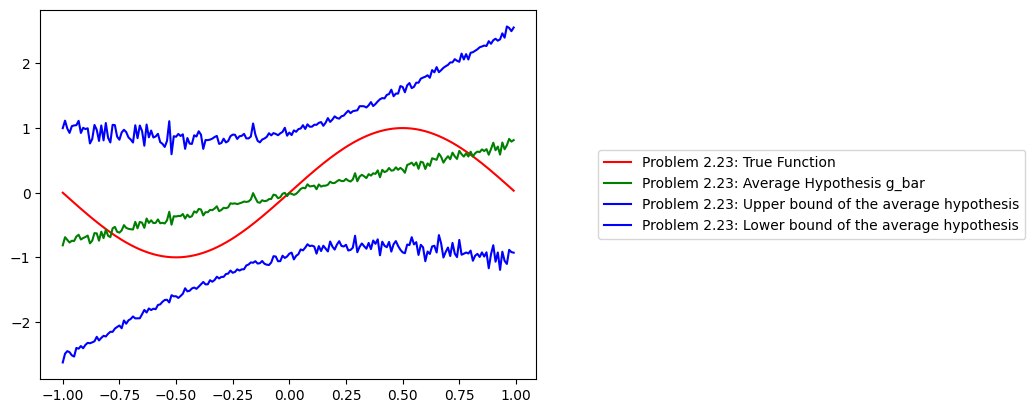

In [2]:
#### Problem 2.23
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import math

from matplotlib.font_manager import FontProperties

def sample(lb, ub, sz):
    # sample randomly from a uniform distribution 
    return lb + np.random.random_sample((sz,))*(ub-lb)

def gd_funca(x, x1, x2):
    #hypothesis found by learning algorithm
    a = (np.sin(math.pi*x2)-np.sin(math.pi*x1))/(x2-x1)
    b = (x2*np.sin(math.pi*x1)-x1*np.sin(math.pi*x2))/(x2-x1)
    return a*x + b

def gd_funcb(x, x1, x2):
    #hypothesis found by learning algorithm
    a = (x1*np.sin(math.pi*x1)+x2*np.sin(math.pi*x2))/(x1**2+x2**2)
    return a*x

def gd_funcc(x, x1, x2):
    #hypothesis found by learning algorithm
    return 0.5*(np.sin(math.pi*x1)+np.sin(math.pi*x2))

def avg_g(x, gdfunc, num_samples, targetfunc):
    #compute the average hypothesis \bar{g} at given point x
    bias_at_x = 0
    gd_funcs = []
    for i in range(num_samples):
        #generate 2 sample data each time
        x1, x2 = sample(-1, 1, 2)
        v = gdfunc(x, x1, x2)
        gd_funcs.append(v)
        
    average_gfunc_at_x = np.mean(gd_funcs)
    #print('x: ', x, 'average_gfunc_at_x: ', average_gfunc_at_x)
    variance_gfunc_at_x = np.var(gd_funcs)
    bias_at_x = (average_gfunc_at_x - targetfunc(x))**2
    return average_gfunc_at_x, variance_gfunc_at_x, bias_at_x

# Compute the expected value of variance, bias and out-of-sample error
def calc_bias_var_eout(gd_func, target_func, num_data_samples, num_x_samples):
    variances, biases, eouts = [], [], []
    for i in range(num_x_samples):
        x = sample(-1, 1, 1)
        _, variance, bias = avg_g(x, gd_func, num_data_samples, target_func)
        variances.append(variance)
        biases.append(bias)

        # Compute the expected value of out-of-sample error w.r.t. data
        eout_on_data = []
        for i in range(num_data_samples):
            x1, x2 = sample(-1, 1, 2)
            v= gd_func(x, x1, x2)
            eout_on_data.append((v-target_func(x))**2) # (g^{D}(x) - f(x))**2

        eout_data_avg = np.mean(eout_on_data)
        eouts.append(eout_data_avg)



    variance = np.mean(variances)    
    bias = np.mean(biases)
    eout = np.mean(eouts)
    print('The variance is: ', variance)
    print('The bias is: ', bias)
    print('The expected out-of-sample error is: ', eout)
    print('The variance+bias is: ', variance+bias)


    xs = np.arange(-1, 1, 0.01)
    true_f, avg_gf, var_gf, ubs, lbs = [],[], [], [], []
    for x in xs:
        true_f.append(target_func(x))
        mean_g, var_g, bias_g = avg_g(x, gd_func, num_data_samples, target_func)
        avg_gf.append(mean_g)
        var_gf.append(var_g)
        ubs.append(mean_g + np.sqrt(var_g))
        lbs.append(mean_g - np.sqrt(var_g))
        
    plt.plot(xs, true_f, color='red', label='Problem 2.23: True Function')
    plt.plot(xs, avg_gf, color='green', label='Problem 2.23: Average Hypothesis g_bar')
    plt.plot(xs, ubs, color='blue', label='Problem 2.23: Upper bound of the average hypothesis')
    plt.plot(xs, lbs, color='blue', label='Problem 2.23: Lower bound of the average hypothesis')
    legend_x = 2.0
    legend_y = 0.5
    plt.legend(['Problem 2.23: True Function', 
                'Problem 2.23: Average Hypothesis g_bar',
                'Problem 2.23: Upper bound of the average hypothesis',
                'Problem 2.23: Lower bound of the average hypothesis'], 
               loc='center right', bbox_to_anchor=(legend_x, legend_y))
    
num_data_samples = 1000
num_x_samples = 1000    
print('------ Hypothesis set: h(x) = ax + b ------')
calc_bias_var_eout(gd_funca, lambda x: np.sin(math.pi*x), num_data_samples, num_x_samples)    

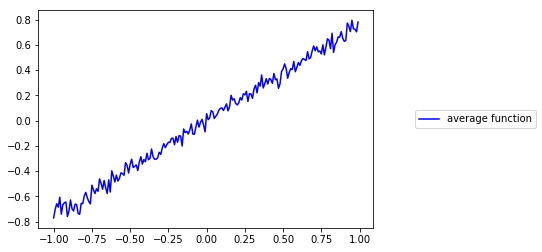

In [143]:
# Check if the average function is good
xs = np.arange(-1, 1, 0.01)
ss = []
for x in xs:    
    ss.append(avg_g(x, gd_funca, 1000, lambda x: np.sin(math.pi*x))[0])
plt.plot(xs, ss, color='blue', label='Problem 2.23: True Function')
legend_x = 1.5
legend_y = 0.5
plt.legend(["average function"], loc='center right', bbox_to_anchor=(legend_x, legend_y))

------ Hypothesis set: h(x) = ax ------
The variance is:  0.23692599271382705
The bias is:  0.2787220177271571
The expected out-of-sample error is:  0.5165234716291182
The variance+bias is:  0.5156480104409842


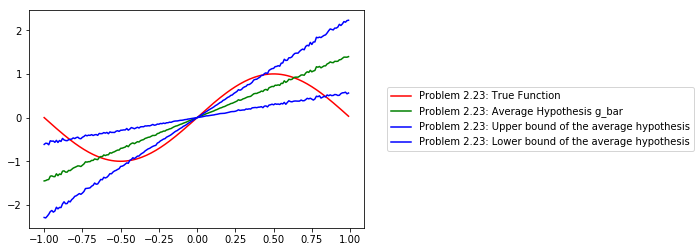

In [145]:
print('------ Hypothesis set: h(x) = ax ------')
calc_bias_var_eout(gd_funcb, lambda x: np.sin(math.pi*x), num_data_samples, num_x_samples)    

------ Hypothesis set: h(x) = b ------
The variance is:  0.2493902010400458
The bias is:  0.4840971440072216
The expected out-of-sample error is:  0.7338247229043513
The variance+bias is:  0.7334873450472674


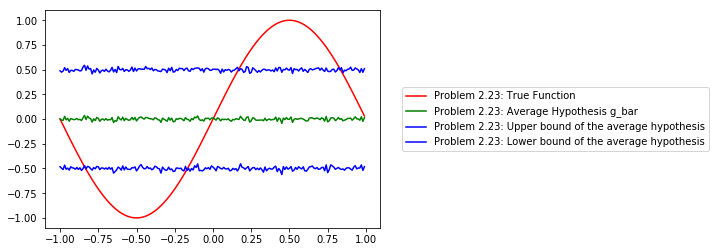

In [146]:
print('------ Hypothesis set: h(x) = b ------')
calc_bias_var_eout(gd_funcc, lambda x: np.sin(math.pi*x), num_data_samples, num_x_samples) 

#### Problem 2.24

* To find the average function $\bar{g}(x)$, let's find the final hypothesis that learing algorithm will arrive. We have our target function $E_{in}(g) = \sum^2_{i=1} \left[f(x_i) - h(x_i)\right]^2 = \sum^2_{i=1} \left[x_i^2 - (ax_i+b)\right]^2$. Take derivative w.r.t. $a$ and $b$ and set the derivatives to zero. We have

\begin{align*}
\frac{\partial E_{in}(g)}{\partial a} &= -2\sum^{2}_{i=1} x_i(x_i^2 - ax_i-b) = 0\\
\frac{\partial E_{in}(g)}{\partial b} &= -2\sum^{2}_{i=1} (x_i^2 - ax_i-b) = 0\\
\end{align*}

Multiply the second equation by $x_1$ and $x_2$ respectively, and subtract from the first equation, we have:

\begin{align*}
x^2_1 - ax_1 - b &= 0\\
x^2_2 - ax_2 - b &= 0\\
\end{align*}

Solve the equations we have:

\begin{align*}
a &= x_1 + x_2\\
b &= -x_1x_2\\
\end{align*}

So the final hypothesis learning algorithm find is: $g^{\mathcal{D}}(x) = (x_1 + x_2)x -x_1x_2$.

* Now let's compute the average function $\bar{g}(x)$.

\begin{align*}
\bar{g}(x) &= E_{\mathcal{D}}\left[g^{\mathcal{D}}(x)\right]\\
&= E_{\mathcal{D}}\left[(x_1 + x_2)x -x_1x_2\right]\\
&= E_{\mathcal{D}}[x_1x] + E_{\mathcal{D}}[x_2x] -E_{\mathcal{D}}[x_1x_2]\\
&= E_{\mathcal{D}}[x_1]x + E_{\mathcal{D}}[x_2]x -E_{\mathcal{D}}[x_1]E_{\mathcal{D}}[x_2]\\
\end{align*}

The last step is due to the independence of points $x_1$ and $x_2$. 

Since the data follows a uniform distribution in the interval $[-1,1]$, we have following moments for $x_1$ and $x_2$: 

\begin{align*}
E_{\mathcal{D}}[x] &= 0\\
E_{\mathcal{D}}[x^2] &= \frac{1}{3}\\
E_{\mathcal{D}}[x^3] &= 0\\
E_{\mathcal{D}}[x^4] &= \frac{1}{5}\\
\end{align*}

Take this results into the above equation, we have

\begin{align*}
\bar{g}(x) &= 0\\
\end{align*}


* Let's compute the variance component

\begin{align*}
\text{variance} &= E_x\left[E_{\mathcal{D}}\left[(g^{\mathcal{D}}(x) - \bar{g}(x))^2\right]\right]\\
&= E_x\left[E_{\mathcal{D}}\left((x_1 + x_2)x -x_1x_2 -0\right)^2\right]\\
&= E_x\left[E_{\mathcal{D}}\left((x_1 + x_2)x -x_1x_2 \right)^2\right]\\
&= E_x\left[E_{\mathcal{D}}\left((x_1 + x_2)^2x^2 + x_1^2x_2^2 -2x_1x_2(x_1+x_2)x\right)\right]\\
&= E_x\left[x^2E_{\mathcal{D}}(x_1^2 + x_2^2+2x_1x_2) + E_{\mathcal{D}}(x_1^2x_2^2) - 2xE_{\mathcal{D}}(x_1^2x_2+x_1x_2^2)\right]\\
\end{align*}

We know $x_1$, $x_2$ are independent, take their moments into above equation, we get

\begin{align*}
\text{variance} &= E_x\left[x^2(\frac{1}{3} + \frac{1}{3}) + (\frac{1}{3}\frac{1}{3})\right]\\
&=E_x\left[\frac{2}{3}x^2 + \frac{1}{9}\right]\\
&= \frac{2}{3}\frac{1}{3} + \frac{1}{9}\\
&=\frac{1}{3}\\
\end{align*}

* Let's compute the bias component

\begin{align*}
\text{bias} &= E_x\left[(\bar{g}(x) - f(x))^2\right]\\
&= E_x\left[(0 - x^2)^2\right]\\
&= E_x\left[x^4\right]\\
&= \frac{1}{5}\\
\end{align*}

* Let's compute the out-of-sample error

\begin{align*}
E_{\mathcal{D}}\left[E_{out}(g^{\mathcal{D}})\right] &= \text{variance}+\text{bias}\\
&= \frac{1}{3} + \frac{1}{5}\\
&= \frac{8}{15}\\
\end{align*}

* Procedure to run the experiment

1. To calculate $\bar{g}(x)$
  * Fix a $x$
  * Do following for a number of times, e.g. 1000
    * Sample two data points from a uniform distribution on $[-1,1]$.
    * Compute the value of $g^{\mathcal{D}}(x)$ at $x$ using the coefficients $a$ and $b$ derived above (or you can find the best fit through some linear regression library, and then compute the value of the best fit at point $x$)
   * Take the average value of function $g^{\mathcal{D}}(x)$. This is the value of $\bar{g}(x)$ at $x$. 
   
1. To compute bias, variance and out-of-sample error
  * Do following for a number of times, e.g. 5000
    * Sample a $x$ from uniform distribution on $[-1,1]$.
    * Follow the procedure to calculate $\bar{g}(x)$ to generate an array of values of function $g^{\mathcal{D}}(x)$ evaluated at the given $x$.
    * Compute the variance of the values, we get $E_\mathcal{D}\left[\left(g^\mathcal{D}(x)-\bar{g}(x)\right)^2\right]$
    * Use the $\bar{g}(x)$ to compute $\left[\left(\bar{g}(x) -f(x)\right)^2\right]$ at each $x$
    * Use the array of values to compute an array of $\left(g^\mathcal{D}(x) - f(x)\right)^2$. Take the average of the resulting array, we have $E_\mathcal{D}\left[\left(g^\mathcal{D}(x) - f(x)\right)^2\right]$
  * Now take the average of above calculated $E_\mathcal{D}\left[\left(g^\mathcal{D}(x)-\bar{g}(x)\right)^2\right]$,     $\left[\left(\bar{g}(x) -f(x)\right)^2\right]$, $E_\mathcal{D}\left[\left(g^\mathcal{D}(x) - f(x)\right)^2\right]$ we obtain the expected values of variance, bias and out-of-sample error: 
  
  $E_x\left[E_\mathcal{D}\left[\left(g^\mathcal{D}(x)-\bar{g}(x)\right)^2\right]\right]$,     $E_x\left[\left[\left(\bar{g}(x) -f(x)\right)^2\right]\right]$, $E_x\left[E_\mathcal{D}\left[\left(g^\mathcal{D}(x) - f(x)\right)^2\right]\right]$
  

* The following code shows how to compute the bias, variance, out-of-sample error respectively. 
  * You can see that the calculated values are close to analytical results.
  * The bias+variance is close to the value calculated directly for out-of-sample error.

The variance is:  0.32930656143125864
The bias is:  0.19668934099203592
The expected out-of-sample error is:  0.525192493981031
The variance+bias is:  0.5259959024232945


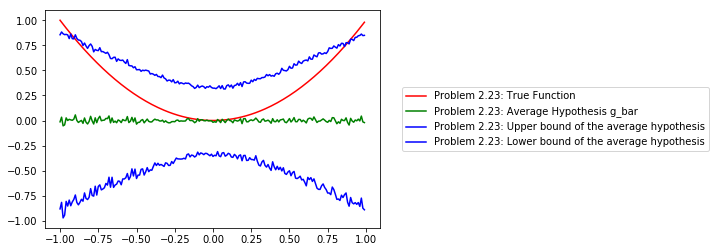

In [147]:
num_data_samples = 1000
num_x_samples = 1000   
def gd_func(x, x1, x2):
    #hypothesis found by learning algorithm
    a = x1 + x2
    b = -x1 * x2
    return a*x + b

calc_bias_var_eout(gd_func, lambda x: x**2, num_data_samples, num_x_samples)    